In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_csv('/content/Traffic.csv')

In [ ]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
df.shape

(2976, 9)

In [ ]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [ ]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

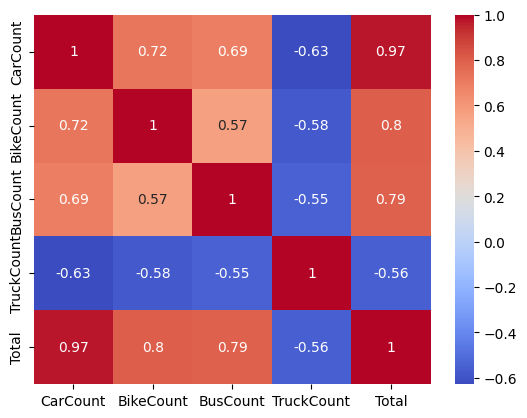

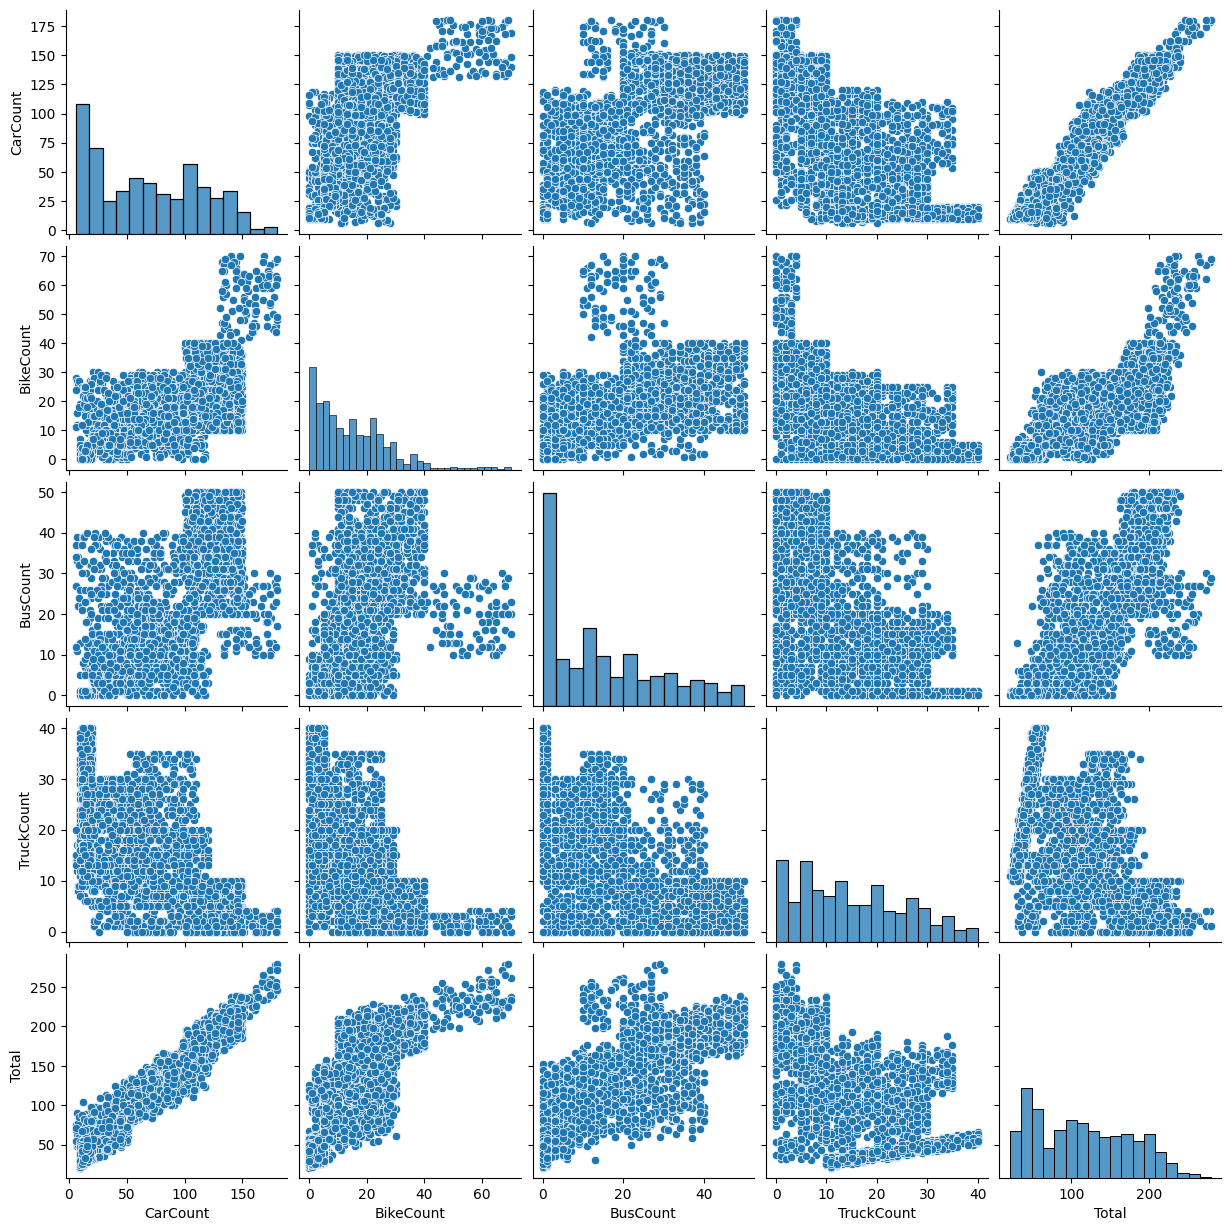

In [ ]:
numeric_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

sns.pairplot(df[numeric_cols])
plt.show()


                     CarCount  BikeCount   BusCount  TruckCount       Total
Traffic Situation                                                          
heavy              130.887097  29.775660  33.014663    5.181818  198.859238
high                82.853583  16.183801  22.841121   20.554517  142.433022
low                 42.960526   9.779605   4.486842    7.766447   64.993421
normal              45.248652   9.538047   8.544038   19.840623   83.171360


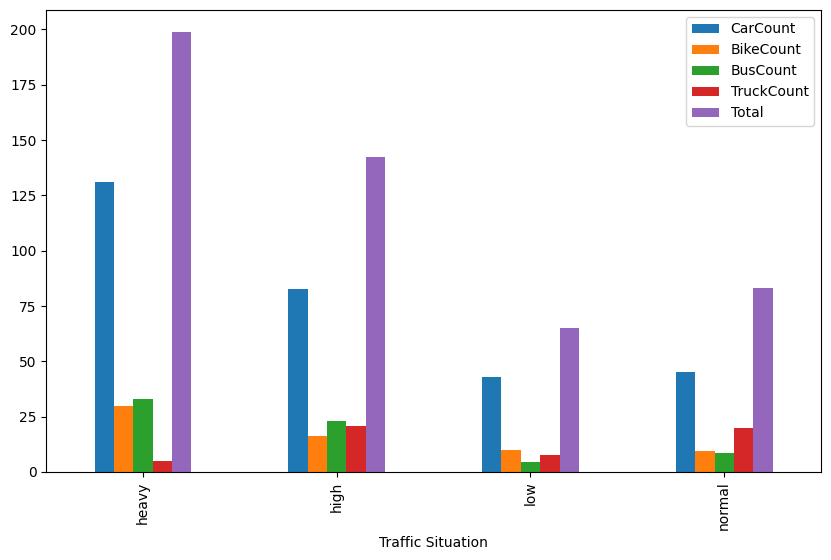

In [ ]:

grouped = df.groupby('Traffic Situation')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].mean()
print(grouped)

grouped.plot(kind='bar', figsize=(10, 6))
plt.show()


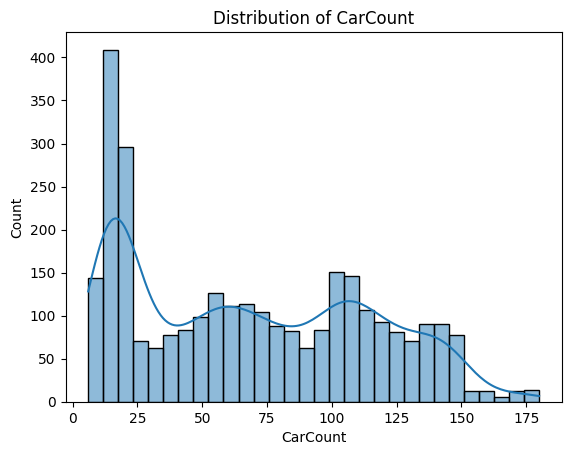

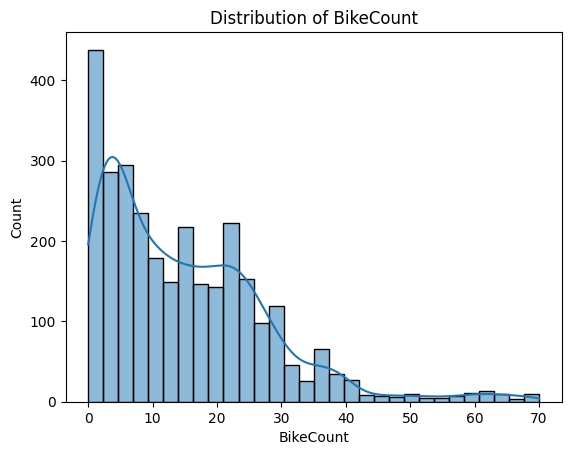

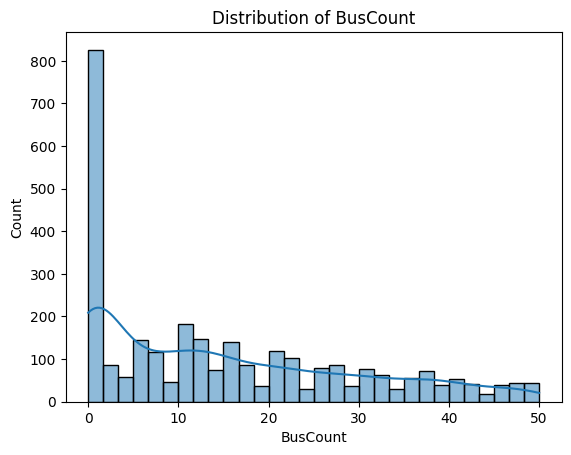

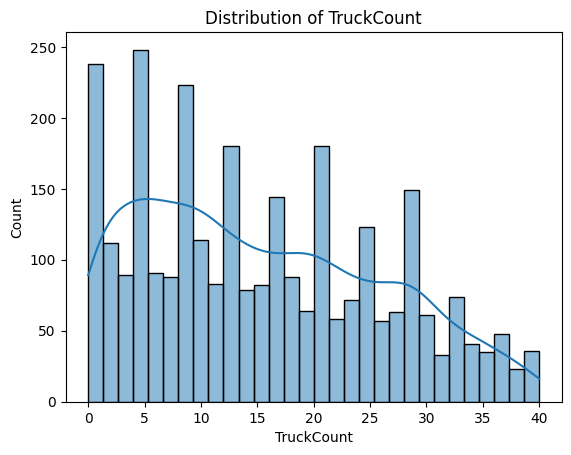

In [ ]:

vehicle_counts = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
df[vehicle_counts].describe()

for col in vehicle_counts:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


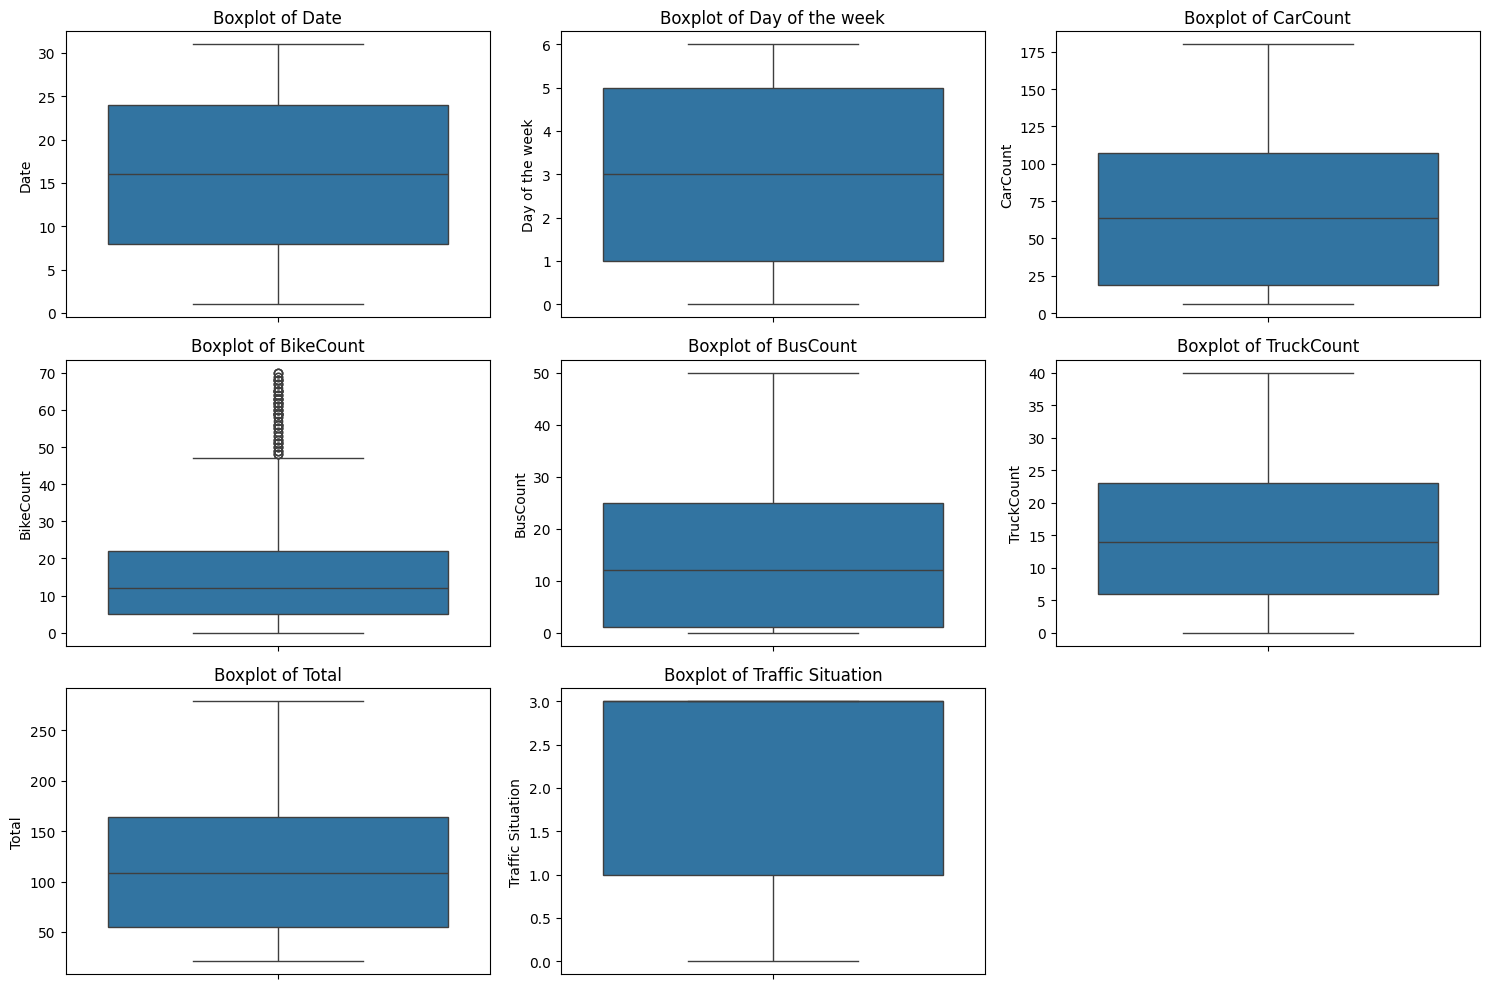

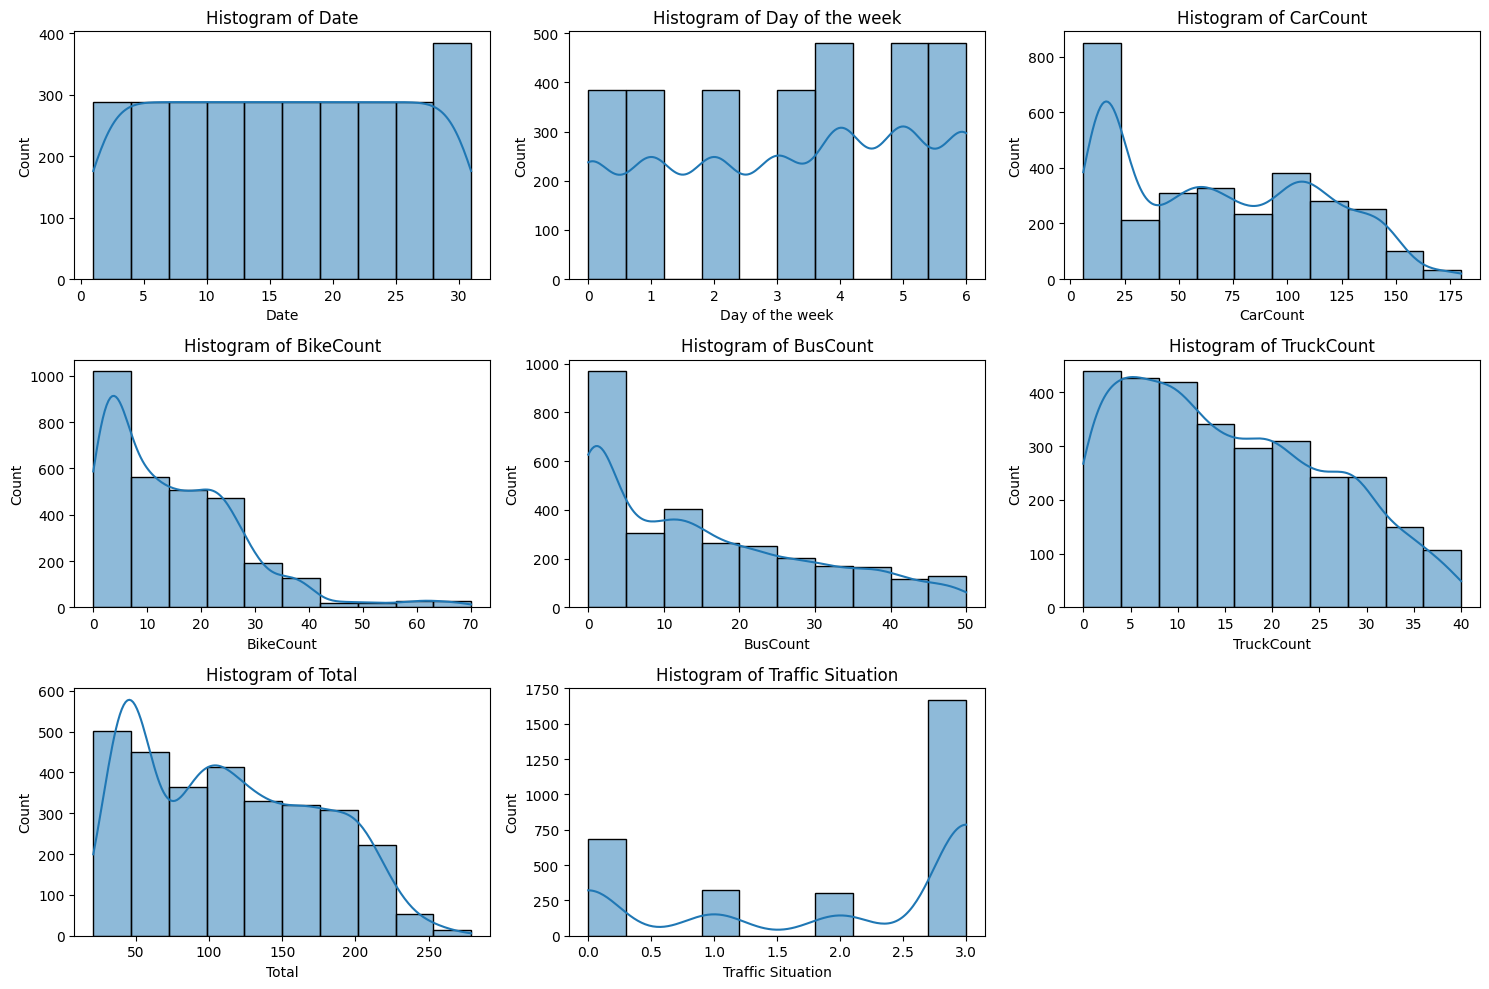

In [ ]:
numeric_columns = ['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
                   'TruckCount', 'Total', 'Traffic Situation']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


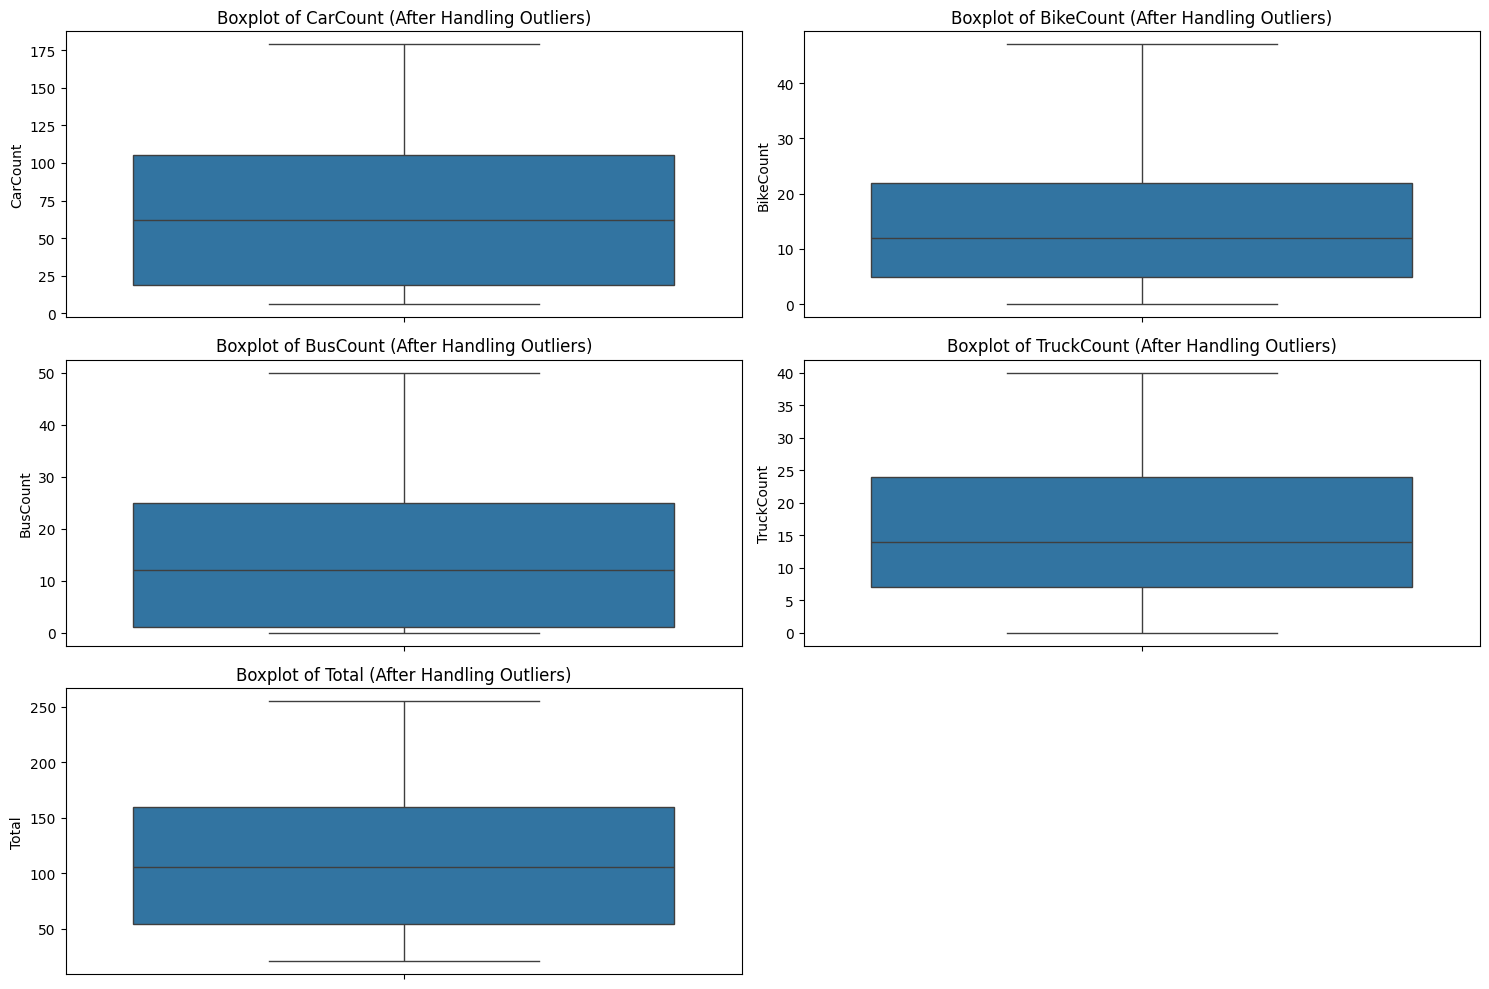

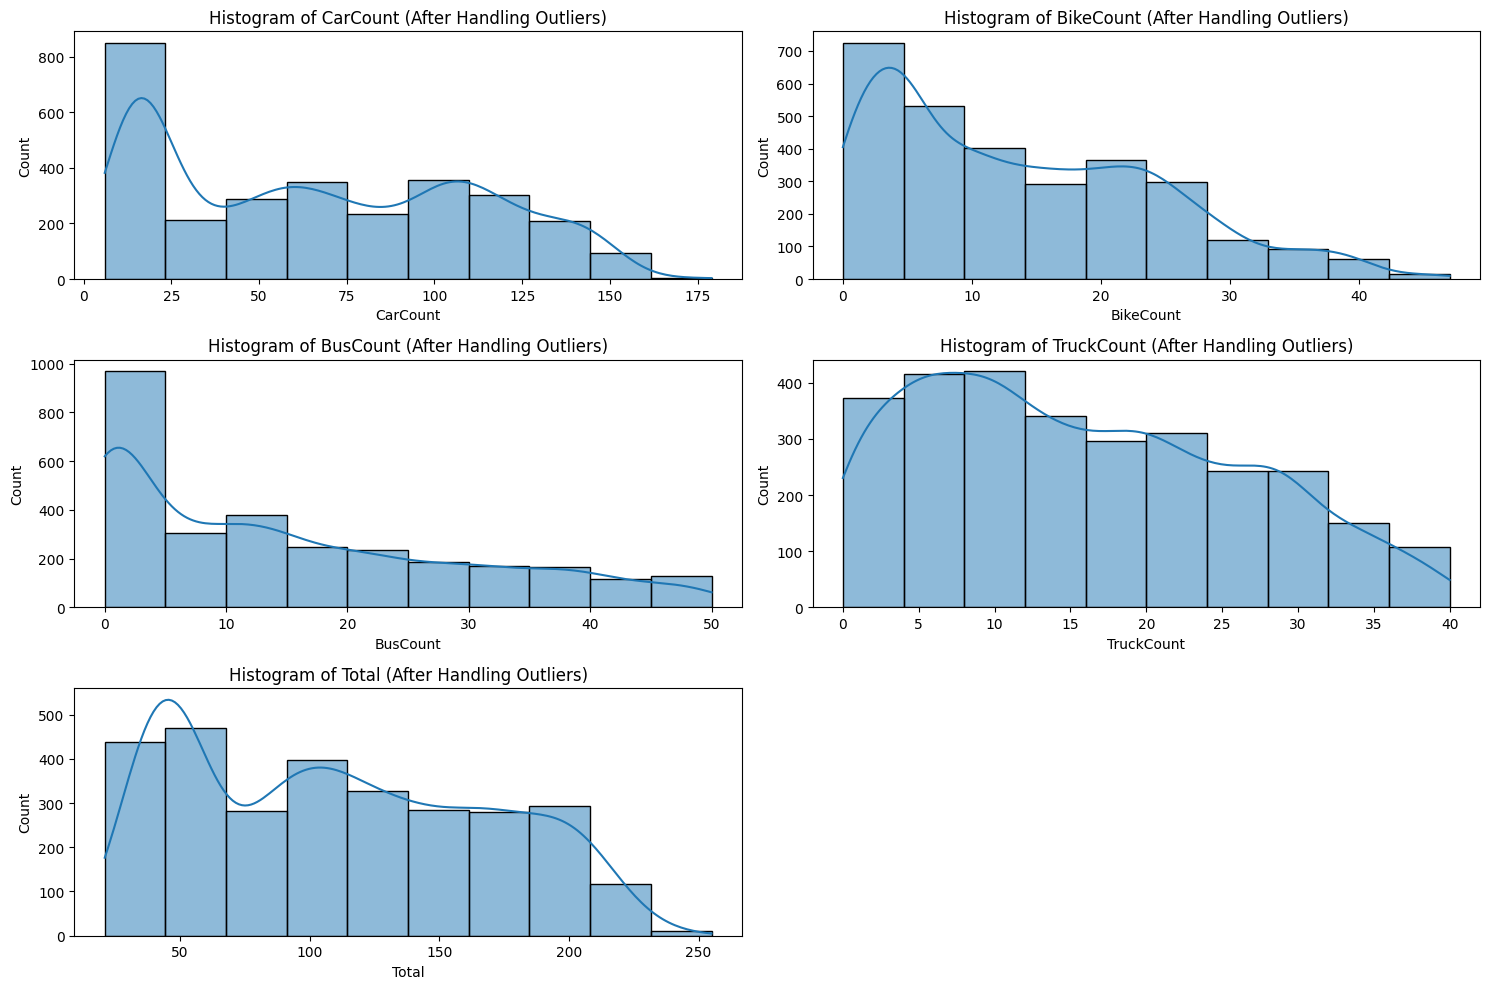

In [ ]:
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

df_cleaned = handle_outliers(df, numeric_columns)

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After Handling Outliers)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_cleaned[col], kde=True, bins=10)
    plt.title(f'Histogram of {col} (After Handling Outliers)')
plt.tight_layout()
plt.show()

In [ ]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

print(df)

      Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0       16    10                5        31          0         4           4   
1       18    10                5        49          0         3           3   
2       20    10                5        46          0         3           6   
3       22    10                5        51          0         2           5   
4       24    10                5        57          6        15          16   
...    ...   ...              ...       ...        ...       ...         ...   
2971     7     9                4        16          3         1          36   
2972     9     9                4        11          0         1          30   
2973    11     9                4        15          4         1          25   
2974    13     9                4        16          5         0          27   
2975    15     9                4        14          3         1          15   

      Total  Traffic Situation  
0     

In [ ]:
from sklearn.model_selection import train_test_split


X = df_cleaned.drop(columns=['Traffic Situation'])
y = df_cleaned['Traffic Situation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training Features (X_train): {X_train.shape}")
print(f"Testing Features (X_test): {X_test.shape}")
print(f"Training Target (y_train): {y_train.shape}")
print(f"Testing Target (y_test): {y_test.shape}")


Training Features (X_train): (2319, 8)
Testing Features (X_test): (580, 8)
Training Target (y_train): (2319,)
Testing Target (y_test): (580,)


In [ ]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Comparison:")
print(results_df)


Model: Logistic Regression
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       127
           1       0.81      0.54      0.65        63
           2       0.79      0.50      0.61        66
           3       0.87      0.93      0.90       340

    accuracy                           0.85       596
   macro avg       0.82      0.74      0.76       596
weighted avg       0.85      0.85      0.84       596

--------------------------------------------------
Model: Random Forest
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       0.97      0.97      0.97        63
           2       1.00      1.00      1.00        66
           3       0.99      0.99      0.99       340

    accuracy                           0.99       596
   macro avg       0.99      0.99      0.99       596
weighted avg       0.99      0.99      0.99       596

-

In [ ]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
import numpy as np

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    fig = ff.create_annotated_heatmap(
        z=cm,
        x=[f"Predicted {i}" for i in range(len(np.unique(y_test)))],
        y=[f"Actual {i}" for i in range(len(np.unique(y_test)))],
        colorscale='Viridis',
        showscale=True
    )

    fig.update_layout(
        title=f'Confusion Matrix - {name}',
        xaxis_title='Predicted Labels',
        yaxis_title='True Labels',
        xaxis=dict(tickmode='array'),
        yaxis=dict(tickmode='array'),
    )

    fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

fig = px.bar(results_df,
             x='Accuracy',
             y='Model',
             color='Accuracy',
             orientation='h',
             title='Model Accuracy Comparison',
             labels={'Accuracy': 'Accuracy Score', 'Model': 'Model Name'},
             color_continuous_scale='Viridis')

fig.show()
